In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/raw/customer_comment.csv')
df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


**Check for missing values and duplicates**

In [32]:
df.info()
df.head()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                9424 non-null   int64 
 1   flight_number             9424 non-null   int64 
 2   origin_station_code       9424 non-null   object
 3   destination_station_code  9424 non-null   object
 4   scheduled_departure_date  9424 non-null   object
 5   arrival_delay_group       9424 non-null   object
 6   departure_delay_group     9424 non-null   object
 7   entity                    9424 non-null   object
 8   verbatim_text             9424 non-null   object
 9   seat_factor_band          9424 non-null   object
 10  ques_verbatim_text        9424 non-null   object
 11  loyalty_program_level     6920 non-null   object
 12  fleet_type_description    9424 non-null   object
 13  fleet_usage               9424 non-null   object
 14  response_group          

Index(['Unnamed: 0', 'flight_number', 'origin_station_code',
       'destination_station_code', 'scheduled_departure_date',
       'arrival_delay_group', 'departure_delay_group', 'entity',
       'verbatim_text', 'seat_factor_band', 'ques_verbatim_text',
       'loyalty_program_level', 'fleet_type_description', 'fleet_usage',
       'response_group', 'sentiments', 'transformed_text'],
      dtype='object')

In [33]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
df.describe(include='all')
total_rows = len(df)
print("Total rows:", total_rows)

print("Duplicate rows:", df.duplicated().sum())
# Show all duplicate rows
duplicates = df[df.duplicated(keep=False)]
display(duplicates)

df.isnull().sum()

Total rows: 9424
Duplicate rows: 2


,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
1882,1790,TPX,LAX,2022-09-12,Early & Ontime,Early & Ontime,Domestic,No.,80+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,NaN
1883,1790,TPX,LAX,2022-09-12,Early & Ontime,Early & Ontime,Domestic,No.,80+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,NaN
4989,1779,YYX,ORX,2022-09-06,Early & Ontime,Early & Ontime,Domestic,No.,90+,Is there anything else you'd like to share abo...,NaN,A320-200,Mainline,non-member,Neutral,NaN
4990,1779,YYX,ORX,2022-09-06,Early & Ontime,Early & Ontime,Domestic,No.,90+,Is there anything else you'd like to share abo...,NaN,A320-200,Mainline,non-member,Neutral,NaN


flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
sentiments                     0
transformed_text            1019
dtype: int64

**Check categories and their unique quantity**


ORIGIN_STATION_CODE
Unique values: 195

Top 10 categories:
origin_station_code
IAX    1149
EWX    1009
DEX     942
ORX     893
SFX     720
LAX     407
LHX     247
HNX     150
SAX     146
BOX     146
Name: count, dtype: int64
------------------------------------------------------------


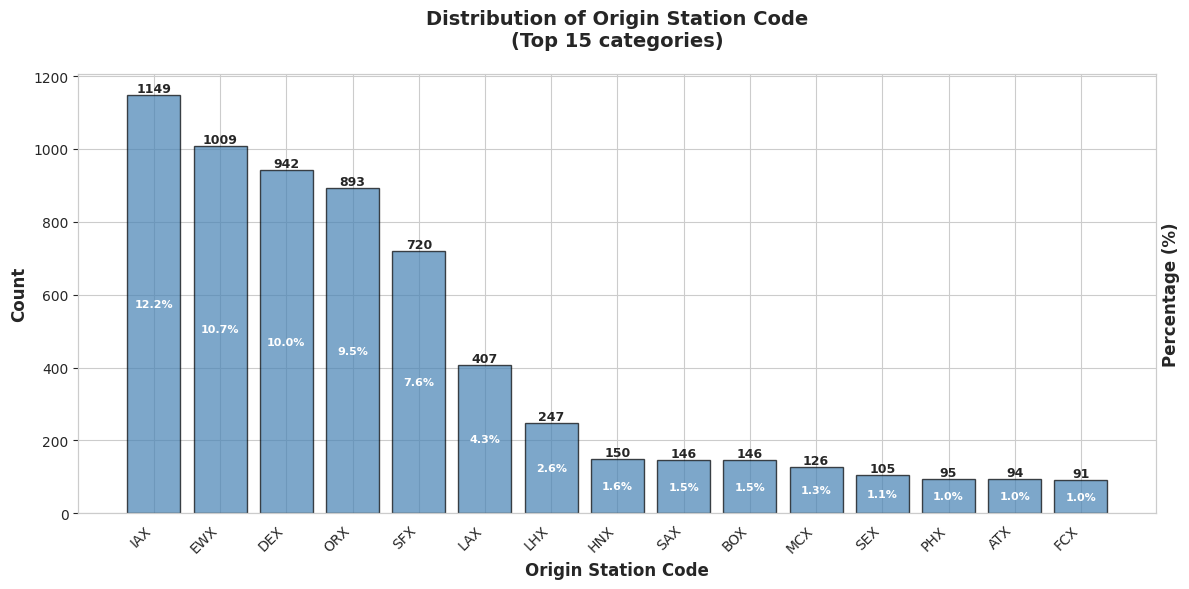

⚠️ Note: Showing top 15 out of 195 total categories


DESTINATION_STATION_CODE
Unique values: 192

Top 10 categories:
destination_station_code
IAX    1427
EWX    1210
ORX     947
DEX     872
SFX     768
LAX     443
LHX     179
HNX     148
MCX     137
SAX     129
Name: count, dtype: int64
------------------------------------------------------------


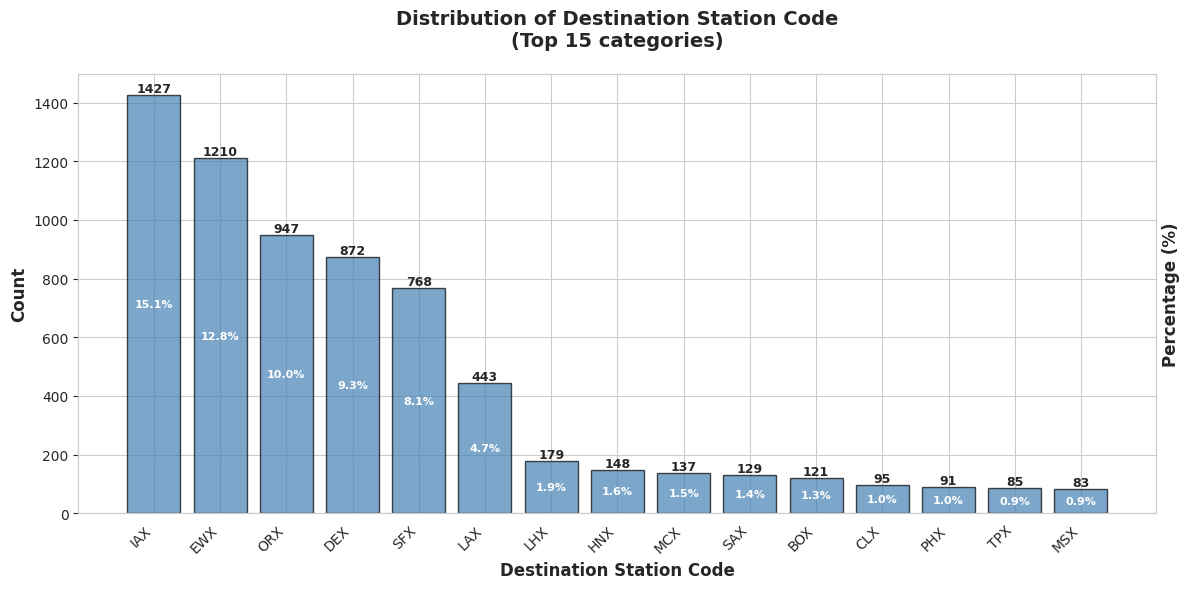

⚠️ Note: Showing top 15 out of 192 total categories


SCHEDULED_DEPARTURE_DATE
Unique values: 30

Top 10 categories:
scheduled_departure_date
2022-09-10    399
2022-09-17    378
2022-09-24    366
2022-09-27    365
2022-09-06    346
2022-09-13    336
2022-09-04    335
2022-09-03    334
2022-09-20    330
2022-09-07    324
Name: count, dtype: int64
------------------------------------------------------------


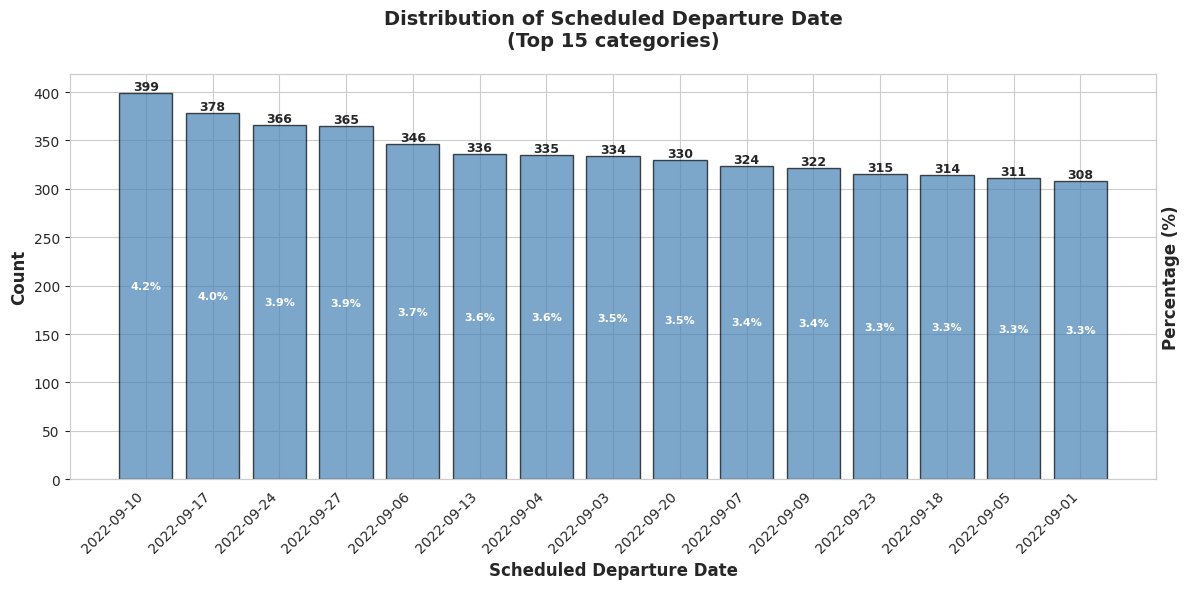

⚠️ Note: Showing top 15 out of 30 total categories


ARRIVAL_DELAY_GROUP
Unique values: 2

Top 10 categories:
arrival_delay_group
Early & Ontime    6811
Delayed           2613
Name: count, dtype: int64
------------------------------------------------------------


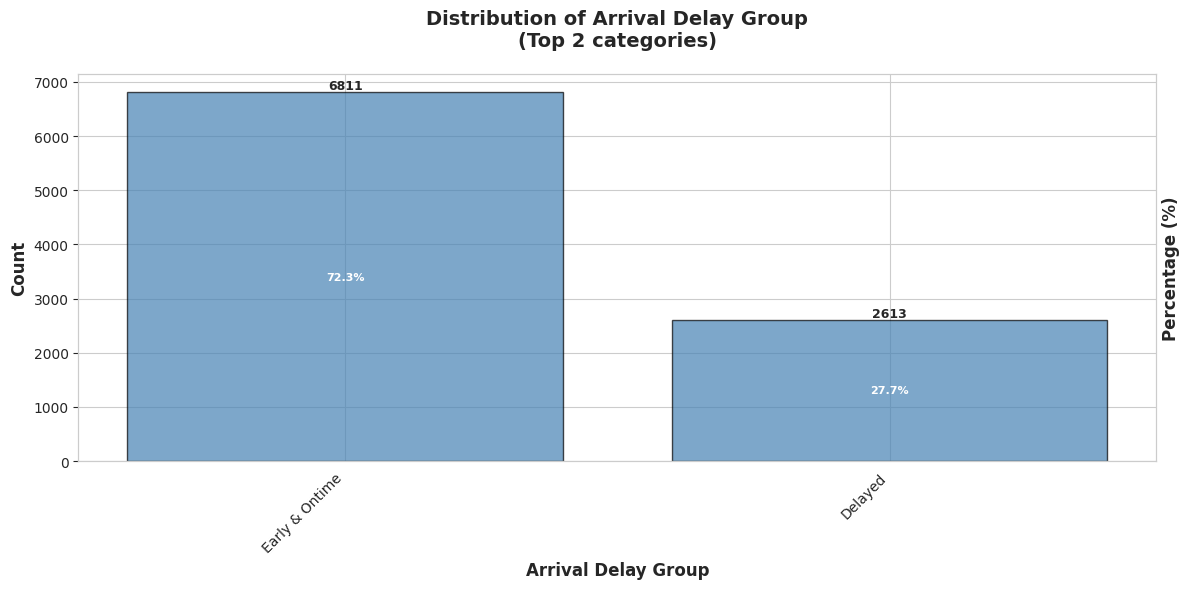


DEPARTURE_DELAY_GROUP
Unique values: 2

Top 10 categories:
departure_delay_group
Early & Ontime    6241
Delayed           3183
Name: count, dtype: int64
------------------------------------------------------------


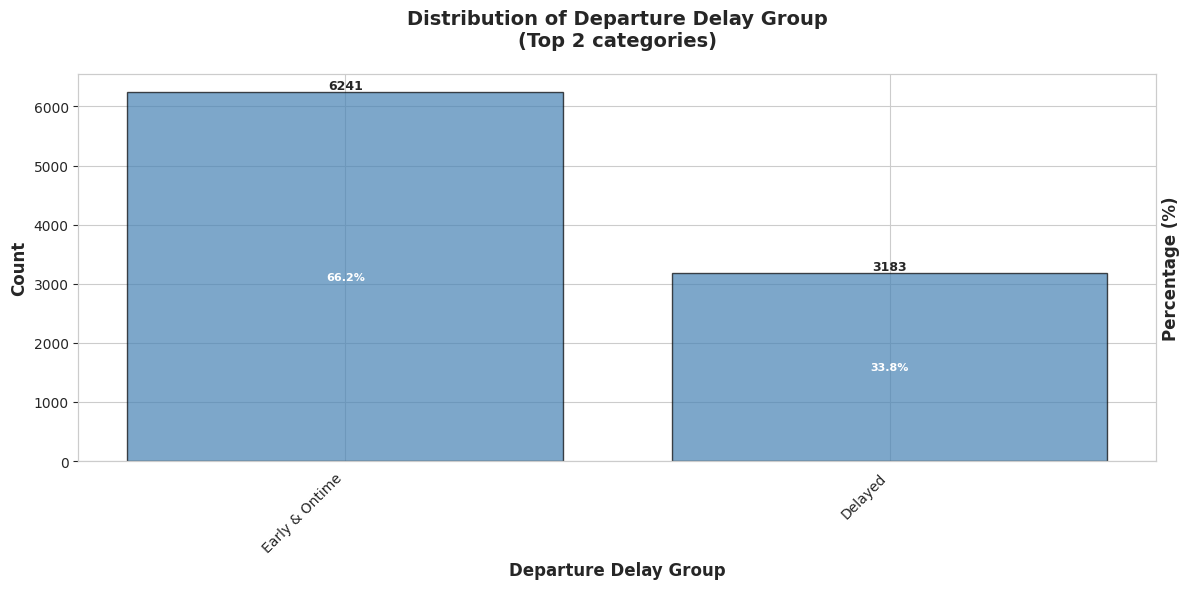


ENTITY
Unique values: 4

Top 10 categories:
entity
Domestic    6593
Atlantic    1887
Latin        678
Pacific      266
Name: count, dtype: int64
------------------------------------------------------------


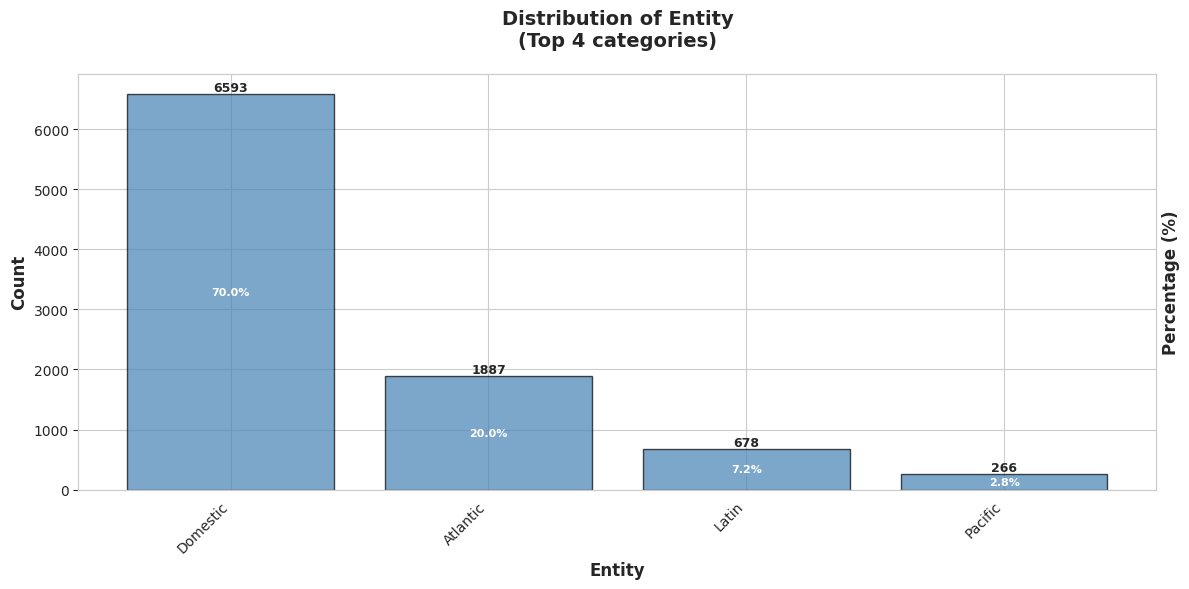


VERBATIM_TEXT
Unique values: 8013

Top 10 categories:
verbatim_text
No.          774
no.          139
None.         82
N/A.          38
Nothing.      20
Nope.         17
Good.         15
All good.     15
Na.           13
n/a.          12
Name: count, dtype: int64
------------------------------------------------------------


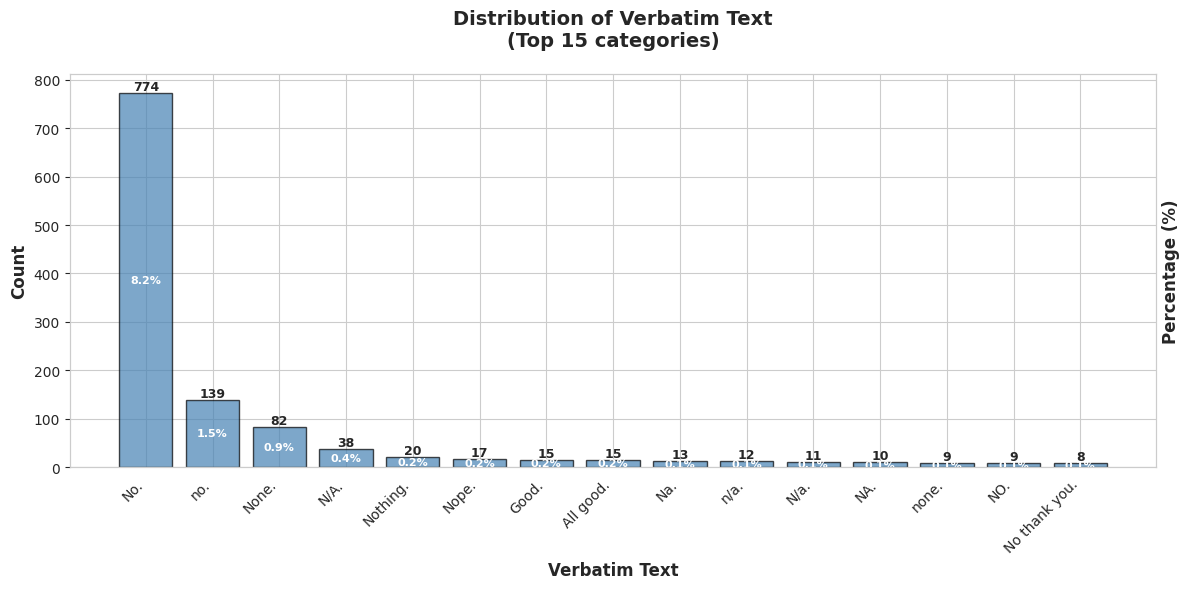

⚠️ Note: Showing top 15 out of 8013 total categories


SEAT_FACTOR_BAND
Unique values: 4

Top 10 categories:
seat_factor_band
90+        6302
80+        1639
70+         786
0 to 70     697
Name: count, dtype: int64
------------------------------------------------------------


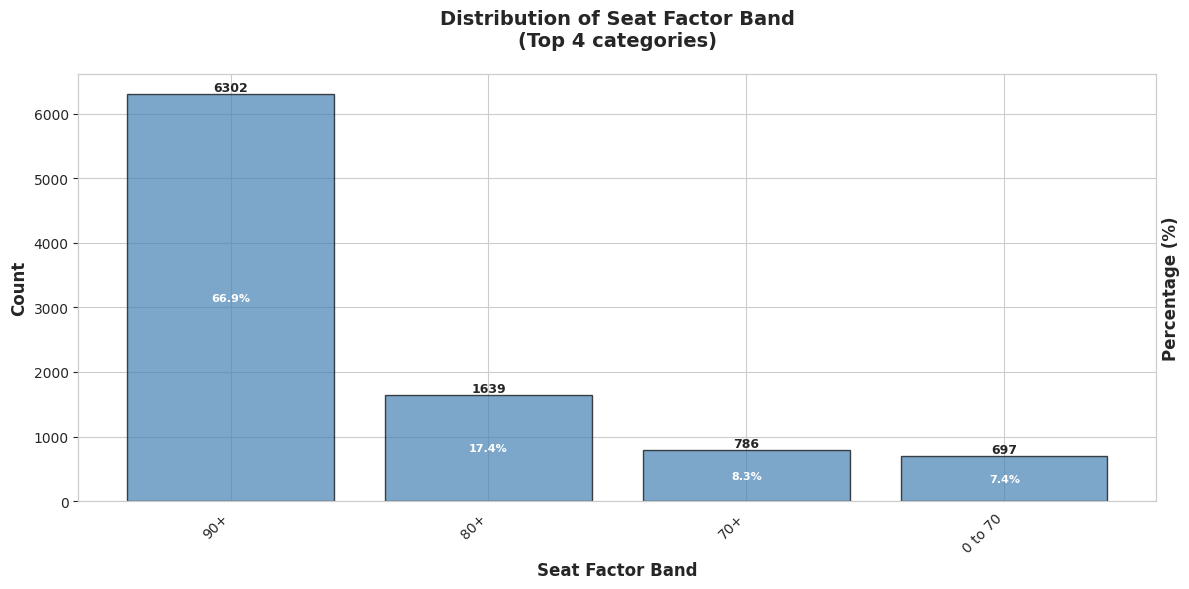


QUES_VERBATIM_TEXT
Unique values: 1

Top 10 categories:
ques_verbatim_text
Is there anything else you'd like to share about the food & beverage served on your flight from [CITY] to [CITY]?    9424
Name: count, dtype: int64
------------------------------------------------------------


/tmp/ipykernel_37/2807923884.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


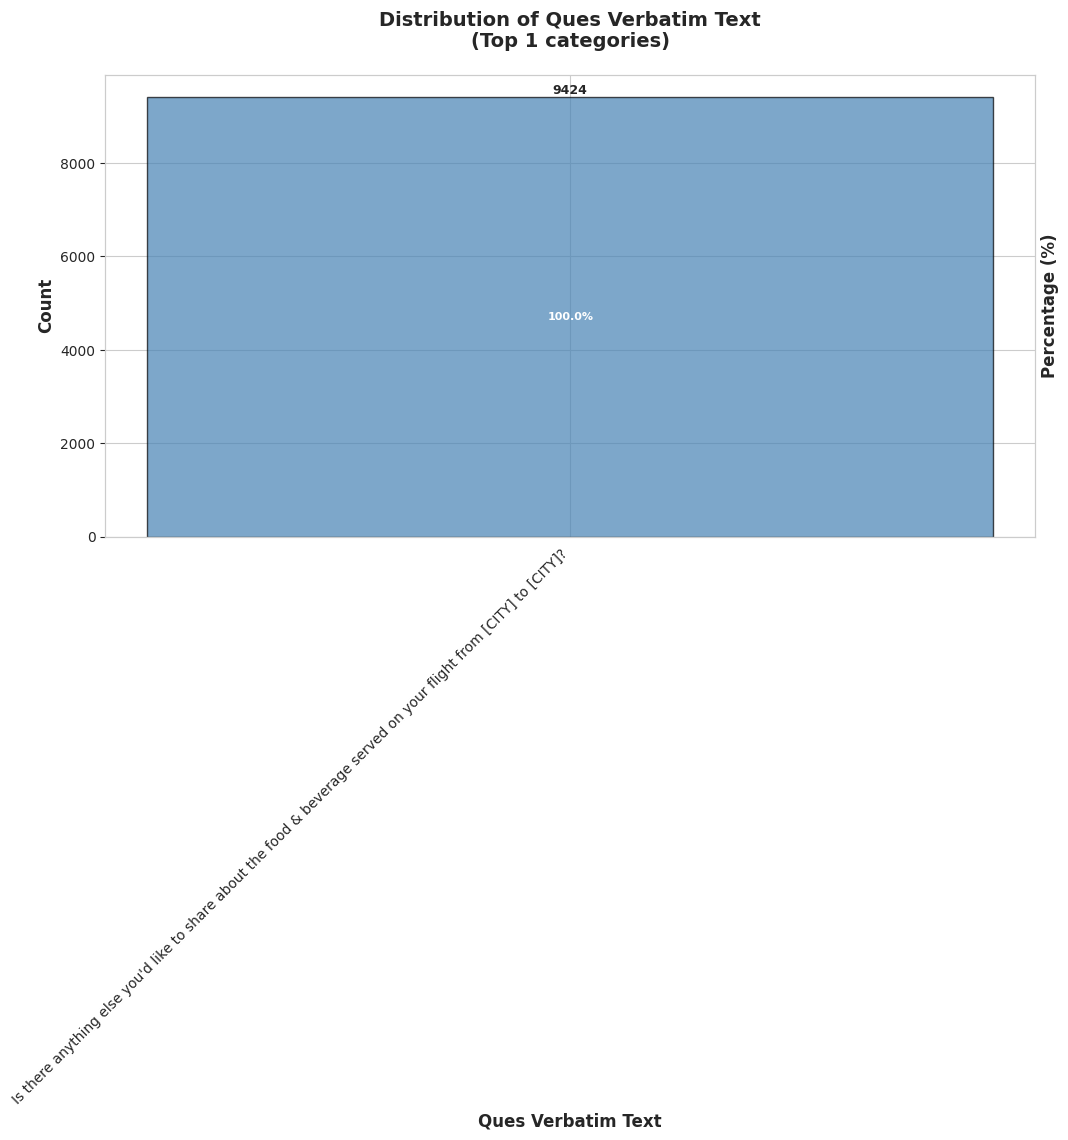


LOYALTY_PROGRAM_LEVEL
Unique values: 8

Top 10 categories:
loyalty_program_level
non-elite           4128
NaN                 2504
premier silver       874
premier 1k           722
premier gold         604
premier platinum     451
global services      140
NBK                    1
Name: count, dtype: int64
------------------------------------------------------------


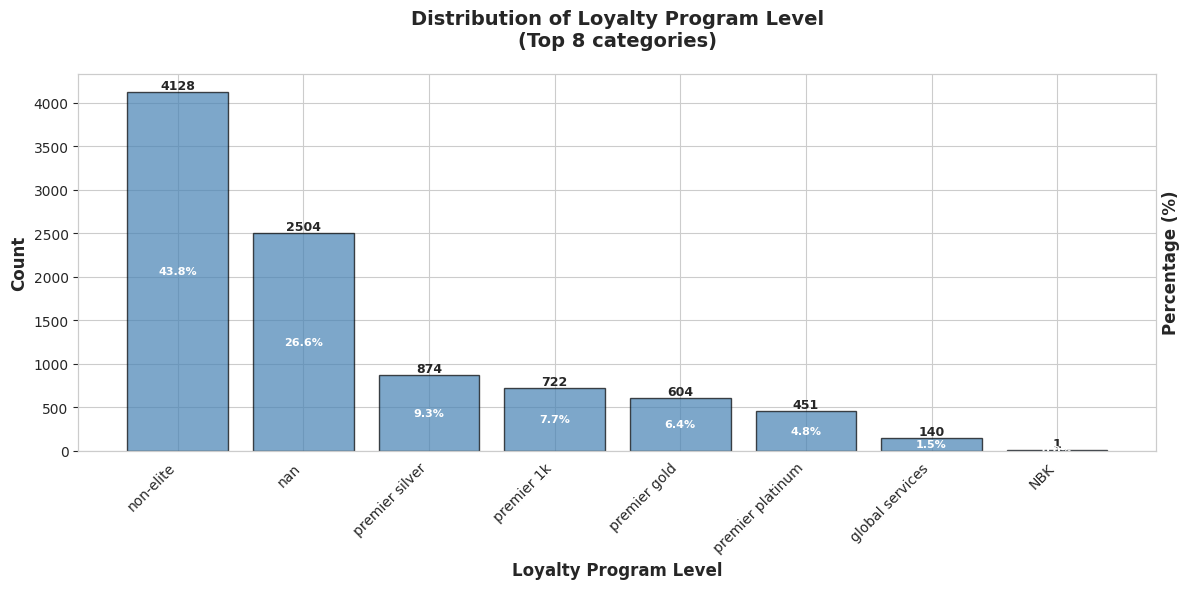


FLEET_TYPE_DESCRIPTION
Unique values: 22

Top 10 categories:
fleet_type_description
B737-900     1451
B737-800     1133
B777-200      882
ERJ-175       714
A320-200      640
A319-100      620
B787-9        490
B777-300      457
B737-MAX9     430
B767-300      386
Name: count, dtype: int64
------------------------------------------------------------


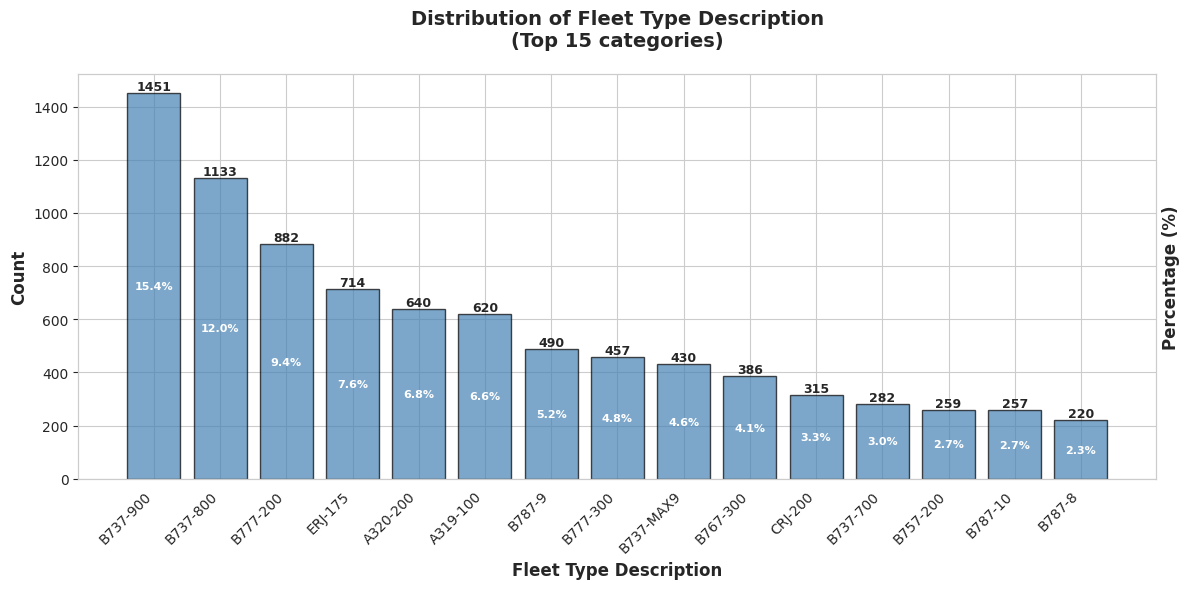

⚠️ Note: Showing top 15 out of 22 total categories


FLEET_USAGE
Unique values: 2

Top 10 categories:
fleet_usage
Mainline    7985
Express     1439
Name: count, dtype: int64
------------------------------------------------------------


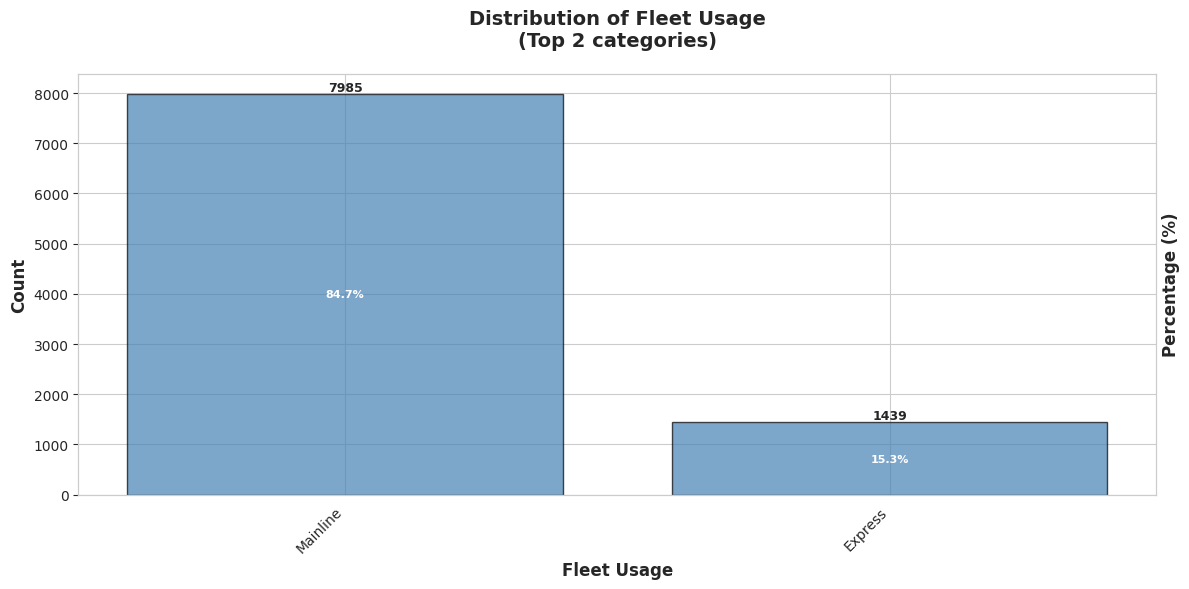


RESPONSE_GROUP
Unique values: 3

Top 10 categories:
response_group
member        6905
non-member    2518
NBK              1
Name: count, dtype: int64
------------------------------------------------------------


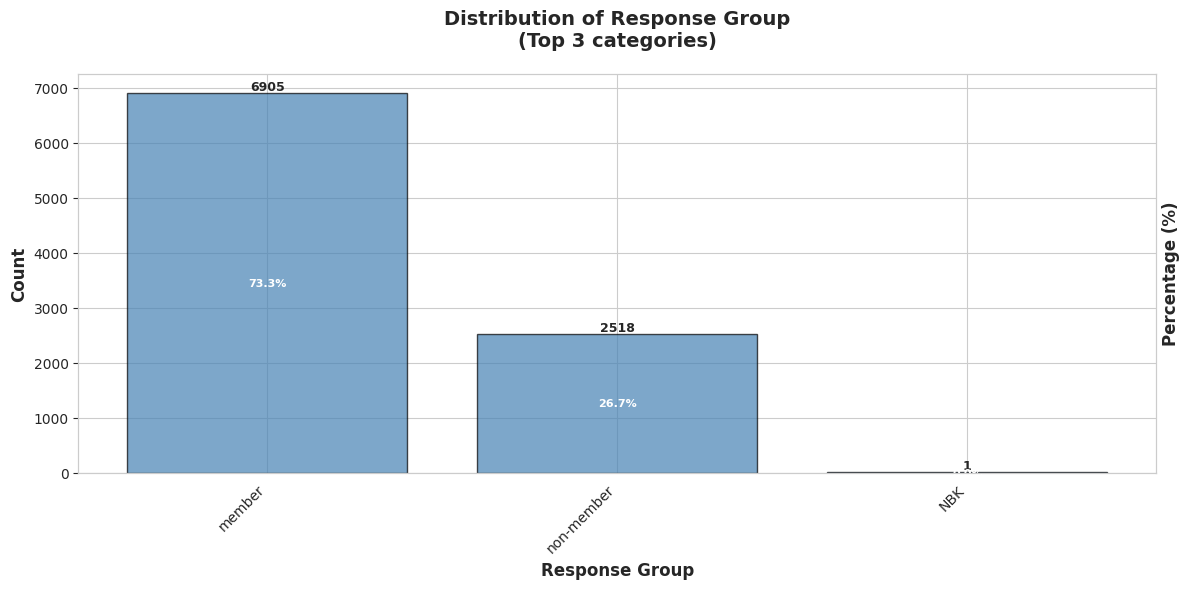


SENTIMENTS
Unique values: 2

Top 10 categories:
sentiments
Neutral     9307
Negative     117
Name: count, dtype: int64
------------------------------------------------------------


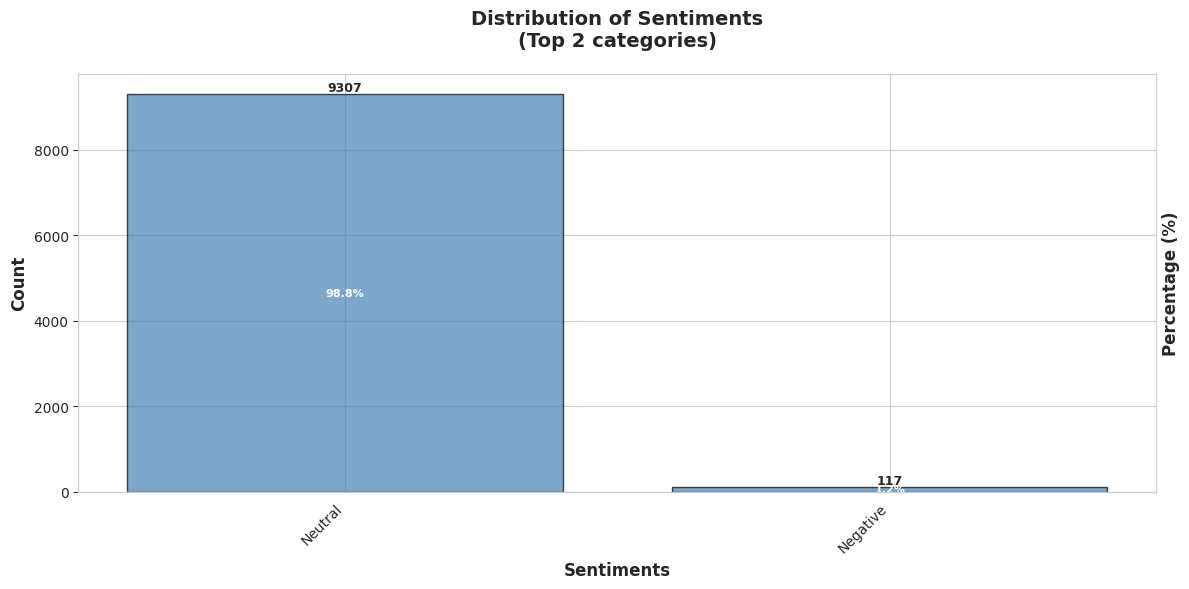


TRANSFORMED_TEXT
Unique values: 7610

Top 10 categories:
transformed_text
NaN      1019
none       97
good       69
thank      41
na         30
noth       27
snack      27
nope       23
great      23
ok         21
Name: count, dtype: int64
------------------------------------------------------------


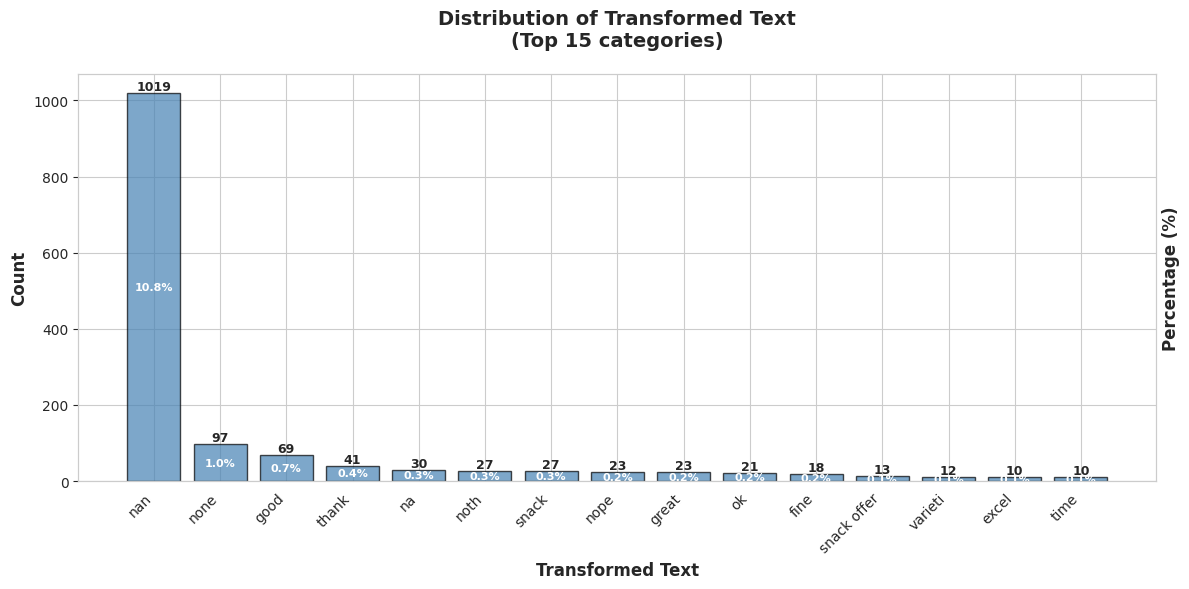

⚠️ Note: Showing top 15 out of 7610 total categories



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Visualize each categorical column
for col in cat_cols:
    # Get value counts
    vc = df[col].value_counts(dropna=False)
    
    # Print summary
    print(f"\n{'='*60}")
    print(f"{col.upper()}")
    print(f"{'='*60}")
    print(f"Unique values: {df[col].nunique(dropna=False)}")
    print(f"\nTop 10 categories:")
    print(vc.head(10))
    print("-" * 60)
    
    # Determine how many categories to show
    n_show = min(15, len(vc))  # Show max 15 categories
    vc_plot = vc.head(n_show)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bar plot
    bars = ax.bar(range(len(vc_plot)), vc_plot.values, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Customize
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}\n(Top {n_show} categories)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis labels
    ax.set_xticks(range(len(vc_plot)))
    ax.set_xticklabels(vc_plot.index, rotation=45, ha='right', fontsize=10)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Add percentage if total is reasonable
    if len(df) > 0:
        ax2 = ax.twinx()
        percentages = (vc_plot.values / len(df)) * 100
        ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
        ax2.set_ylim(0, max(percentages) * 1.15)
        ax2.set_yticks([])
        
        # Add percentage labels
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height * 0.5,
                    f'{pct:.1f}%',
                    ha='center', va='center', fontsize=8, 
                    color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # If too many unique values, show a note
    if len(vc) > n_show:
        print(f"⚠️ Note: Showing top {n_show} out of {len(vc)} total categories\n")

In [36]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n--- {col.upper()} ---")
    print(f"Unique values: {df[col].nunique(dropna=False)}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)


--- ORIGIN_STATION_CODE ---
Unique values: 195
origin_station_code
IAX    1149
EWX    1009
DEX     942
ORX     893
SFX     720
       ... 
TKX       1
PQX       1
MHX       1
GDX       1
LRX       1
Name: count, Length: 195, dtype: int64
--------------------------------------------------

--- DESTINATION_STATION_CODE ---
Unique values: 192
destination_station_code
IAX    1427
EWX    1210
ORX     947
DEX     872
SFX     768
       ... 
ITX       1
TKX       1
TAX       1
GTX       1
BEX       1
Name: count, Length: 192, dtype: int64
--------------------------------------------------

--- SCHEDULED_DEPARTURE_DATE ---
Unique values: 30
scheduled_departure_date
2022-09-10    399
2022-09-17    378
2022-09-24    366
2022-09-27    365
2022-09-06    346
2022-09-13    336
2022-09-04    335
2022-09-03    334
2022-09-20    330
2022-09-07    324
2022-09-09    322
2022-09-23    315
2022-09-18    314
2022-09-05    311
2022-09-01    308
2022-09-15    305
2022-09-26    305
2022-09-02    303
2022-09-1

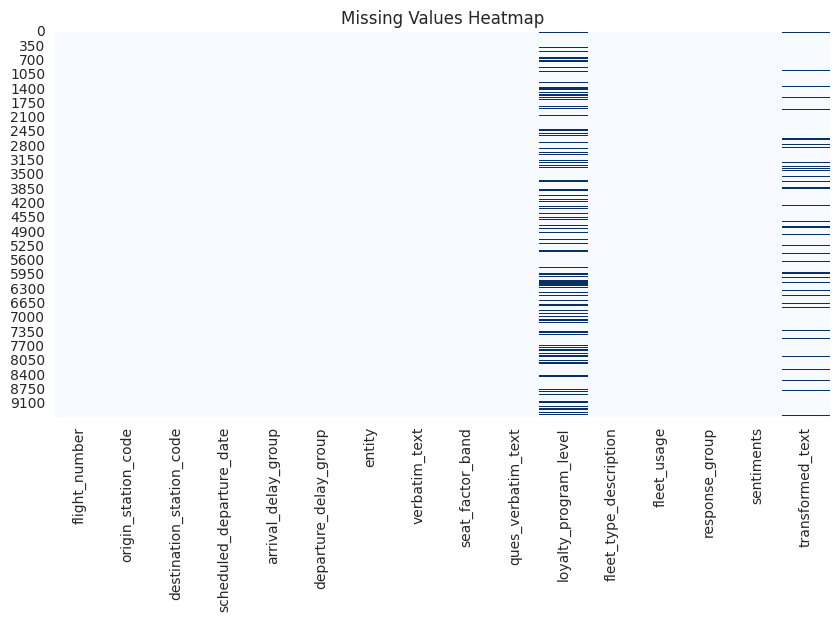

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Values Heatmap')
plt.show()

**Check for outliers**

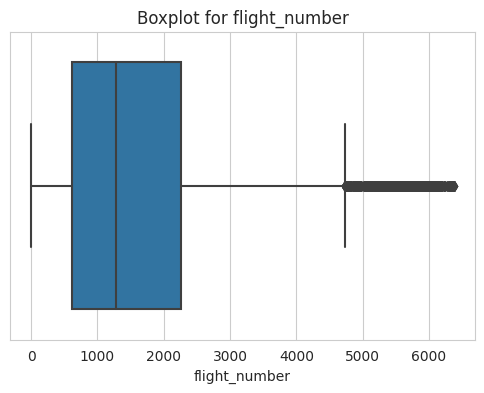

In [38]:
numeric_cols = df.select_dtypes(include=['number']).columns
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


**Check relations between columns**

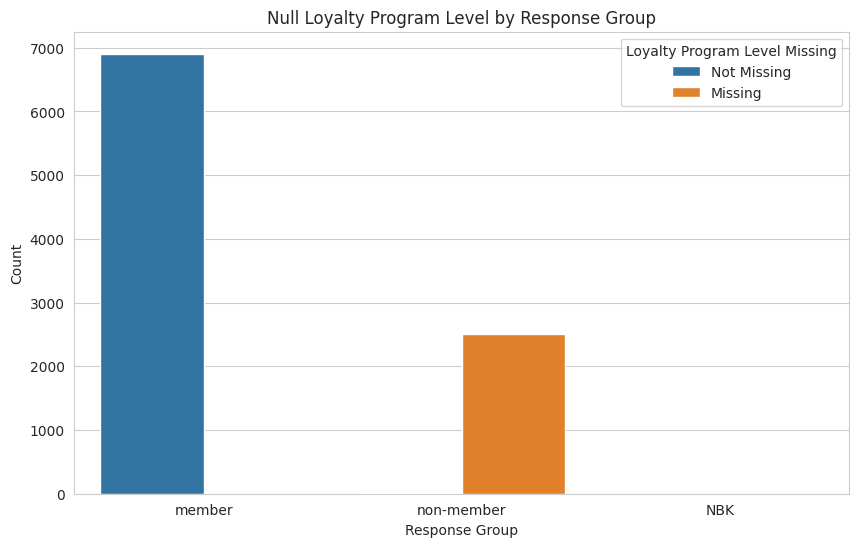

In [39]:
sns.countplot(x=df['response_group'], hue=df['loyalty_program_level'].isna())
plt.title('Null Loyalty Program Level by Response Group')
plt.xlabel('Response Group')
plt.ylabel('Count')
plt.legend(title='Loyalty Program Level Missing', labels=['Not Missing', 'Missing'])
plt.show()


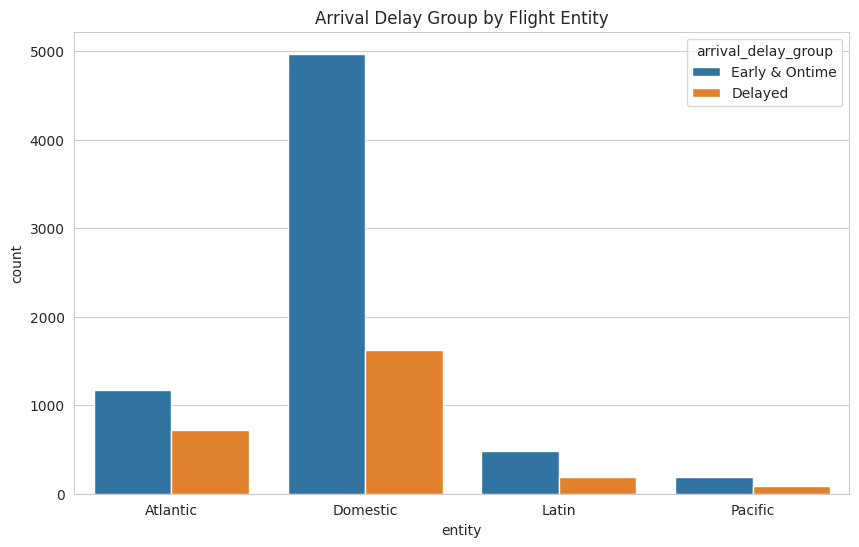

In [40]:
sns.countplot(data=df, x='entity', hue='arrival_delay_group')
plt.title("Arrival Delay Group by Flight Entity")
plt.show()

In [41]:
# Normalized by sentiments (rows)
pd.crosstab(df['sentiments'], df['arrival_delay_group'], normalize='index') * 100


arrival_delay_group,Delayed,Early & Ontime
sentiments,,
Negative,28.205128,71.794872
Neutral,27.721070,72.278930


In [42]:
# Crosstab (percentages)
pd.crosstab(df['response_group'], df['sentiments'], normalize='index') * 100

sentiments,Negative,Neutral
response_group,,
NBK,0.000000,100.000000
member,1.202028,98.797972
non-member,1.350278,98.649722


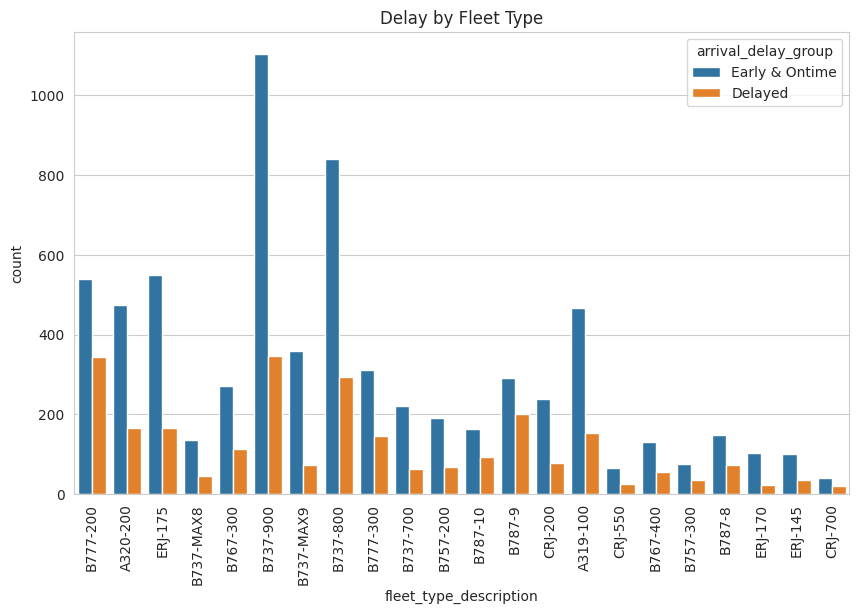

In [43]:
sns.countplot(data=df, x='fleet_type_description', hue='arrival_delay_group')
plt.xticks(rotation=90)
plt.title("Delay by Fleet Type")
plt.show()

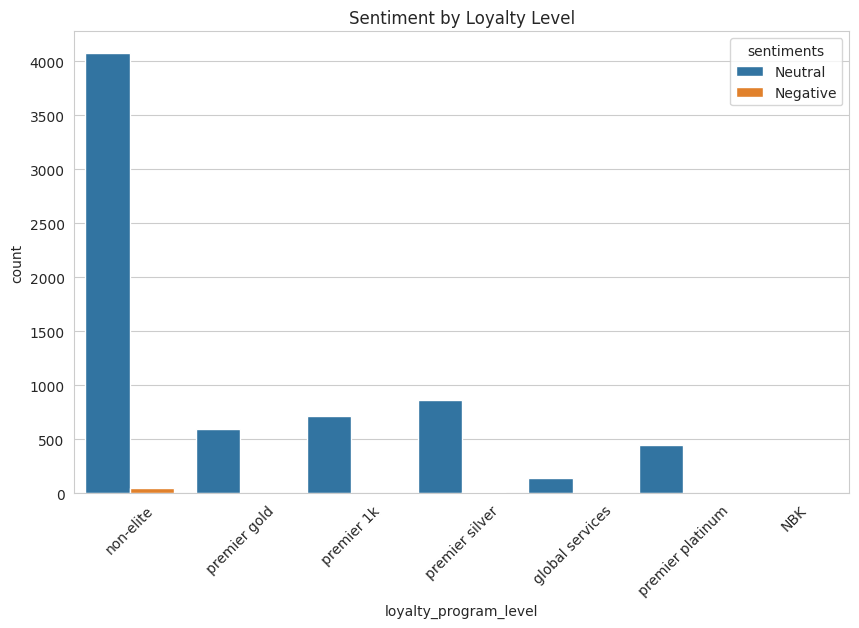

In [44]:
sns.countplot(data=df, x='loyalty_program_level', hue='sentiments')
plt.xticks(rotation=45)
plt.title("Sentiment by Loyalty Level")
plt.show()

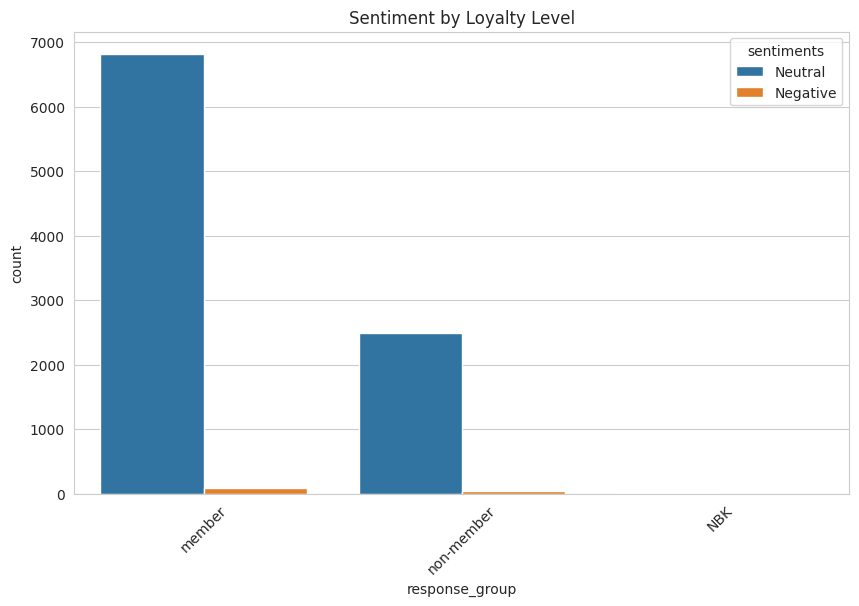

In [45]:
sns.countplot(data=df, x='response_group', hue='sentiments')
plt.xticks(rotation=45)
plt.title("Sentiment by Loyalty Level")
plt.show()

In [46]:
df.loc[df['transformed_text'].isna(), 'verbatim_text'].value_counts()

verbatim_text
No.                     774
no.                     139
N/A.                     38
n/a.                     12
N/a.                     11
NO.                       9
.                         7
I did not have any.       2
More.                     2
Not.                      2
Not at all.               2
Y.                        2
No!.                      2
There was not any.        2
no,.                      1
<:)>.                     1
N-A.                      1
We did not have any.      1
No….                      1
N/.                       1
Other.                    1
That is all.              1
n.a.                      1
There was not any….       1
there was not any.        1
..                        1
...                       1
No, that is it!.          1
1/3 of a can?.            1
Name: count, dtype: int64

In [47]:
df.loc[df['transformed_text'] == 'none', 'verbatim_text'].value_counts()

verbatim_text
None.               82
none.                9
NONE.                2
Or none.             1
There were none.     1
I had none.          1
There was none.      1
Name: count, dtype: int64

In [48]:
df.loc[(df['sentiments'] == 'Negative') & (df['transformed_text'].isna()), 'verbatim_text']

862                    Not.
1229    There was not any….
2904                   n.a.
3676                   Not.
5109                   No….
Name: verbatim_text, dtype: object

# **Data cleaning**

**1. Handle missing values**

In [49]:
df['loyalty_program_level'] = df['loyalty_program_level'].replace('NBK', 'Unknown').fillna('non-member')

In [50]:
useless_text = ['none', 'na', 'no', '']
df['transformed_text'] = df['transformed_text'].fillna('').str.lower()
df['transformed_text'] = df['transformed_text'].apply(
    lambda x: 'no_comment' if x.strip() in useless_text else x.strip()
)

**2. Handle datatypes**

In [51]:
pd.to_datetime(df['scheduled_departure_date'], errors='coerce')
df['scheduled_departure_date'].isna().sum()

0

**3. Standardize Text / Categorical Data**

In [52]:
df.drop(columns=['ques_verbatim_text'], inplace=True)
df.drop(columns=['transformed_text'], inplace=True)

In [53]:
useless = ['no.', 'no', 'none.', 'n/a.', 'nothing.', '', ' ']
df['verbatim_text'] = df['verbatim_text'].str.lower().fillna('')
df['verbatim_text'] = df['verbatim_text'].apply(lambda x: 'no_comment' if x.strip() in useless else x.strip())

In [54]:
df = df[df['response_group'] != 'NBK']

**4. Analysis after cleaning**


Fleet Usage vs Sentiments (Counts):
 sentiments   Negative  Neutral
fleet_usage                   
Express            20     1418
Mainline           97     7888

Fleet Usage vs Sentiments (Proportions):
 sentiments   Negative   Neutral
fleet_usage                    
Express      0.013908  0.986092
Mainline     0.012148  0.987852

Chi-square: 0.181, p-value: 0.6704


<Figure size 800x500 with 0 Axes>

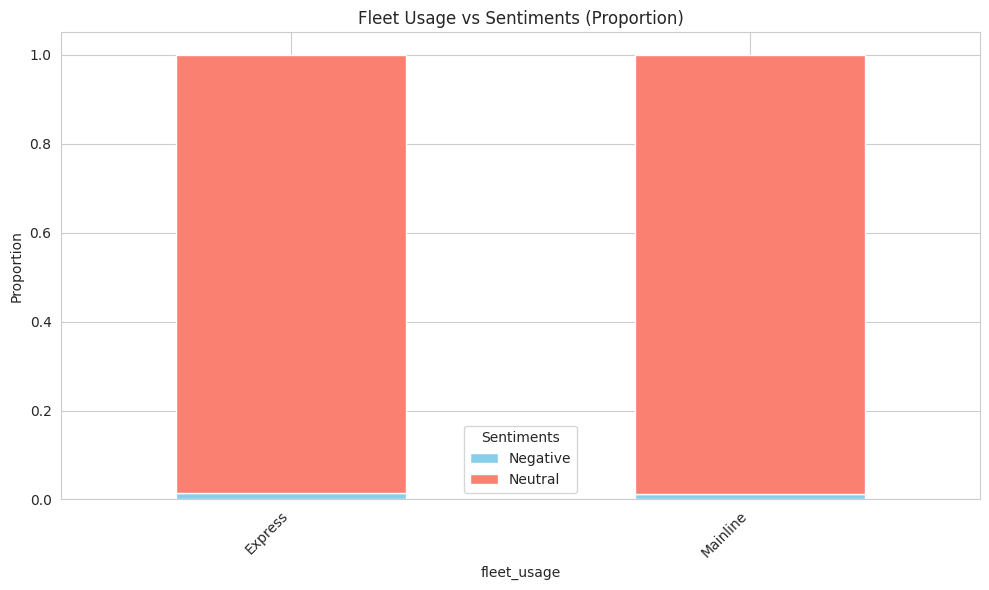


Response Group vs Sentiments (Counts):
 sentiments      Negative  Neutral
response_group                   
member                83     6822
non-member            34     2484

Response Group vs Sentiments (Proportions):
 sentiments      Negative   Neutral
response_group                    
member          0.012020  0.987980
non-member      0.013503  0.986497

Chi-square: 0.221, p-value: 0.6384


<Figure size 800x500 with 0 Axes>

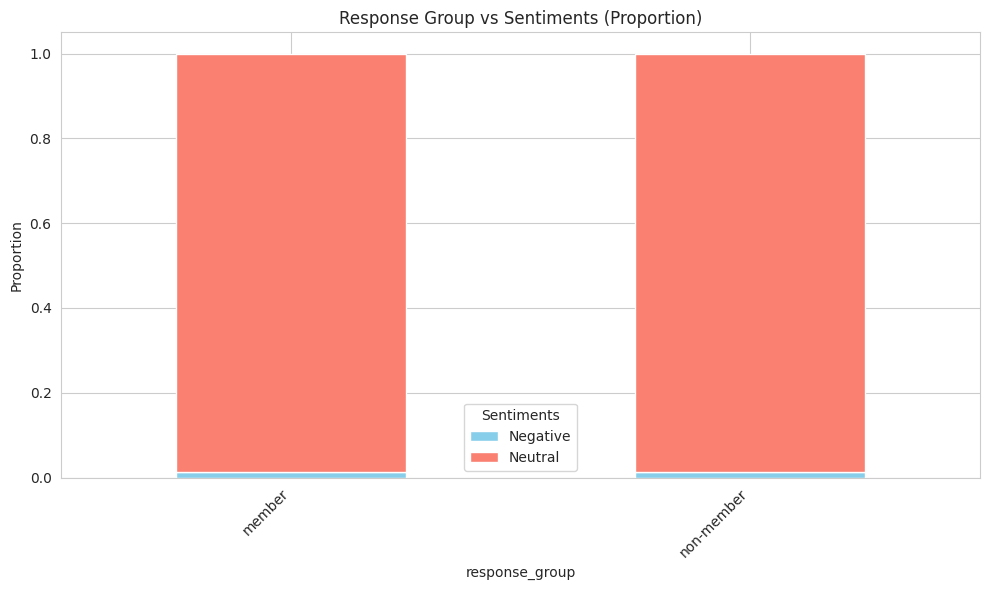


Loyalty Program Level vs Sentiments (Counts):
 sentiments             Negative  Neutral
loyalty_program_level                   
global services               0      140
non-elite                    53     4075
non-member                   33     2471
premier 1k                    8      714
premier gold                  8      596
premier platinum              3      448
premier silver               12      862

Loyalty Program Level vs Sentiments (Proportions):
 sentiments             Negative   Neutral
loyalty_program_level                    
global services        0.000000  1.000000
non-elite              0.012839  0.987161
non-member             0.013179  0.986821
premier 1k             0.011080  0.988920
premier gold           0.013245  0.986755
premier platinum       0.006652  0.993348
premier silver         0.013730  0.986270

Chi-square: 3.423, p-value: 0.7542


<Figure size 800x500 with 0 Axes>

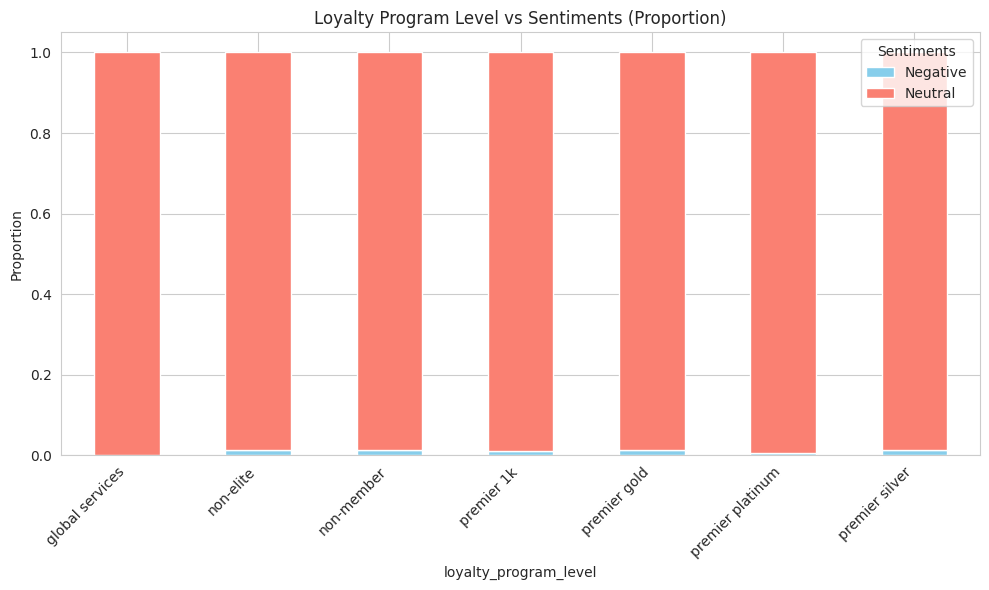


NEUTRAL SENTIMENT AND NO_COMMENT ANALYSIS

Sentiments vs Comment Status (Counts):
has_comment  has_comment  no_comment
sentiments                          
Negative             117           0
Neutral             8205        1101

Sentiments vs Comment Status (Percentages):
has_comment  has_comment  no_comment
sentiments                          
Negative          100.00        0.00
Neutral            88.17       11.83

Chi-square: 14.548, p-value: 0.0001

📊 Neutral Sentiment Analysis:
   - Total Neutral sentiments: 9306
   - Neutral with no_comment: 1101
   - Percentage: 11.83%


<Figure size 800x500 with 0 Axes>

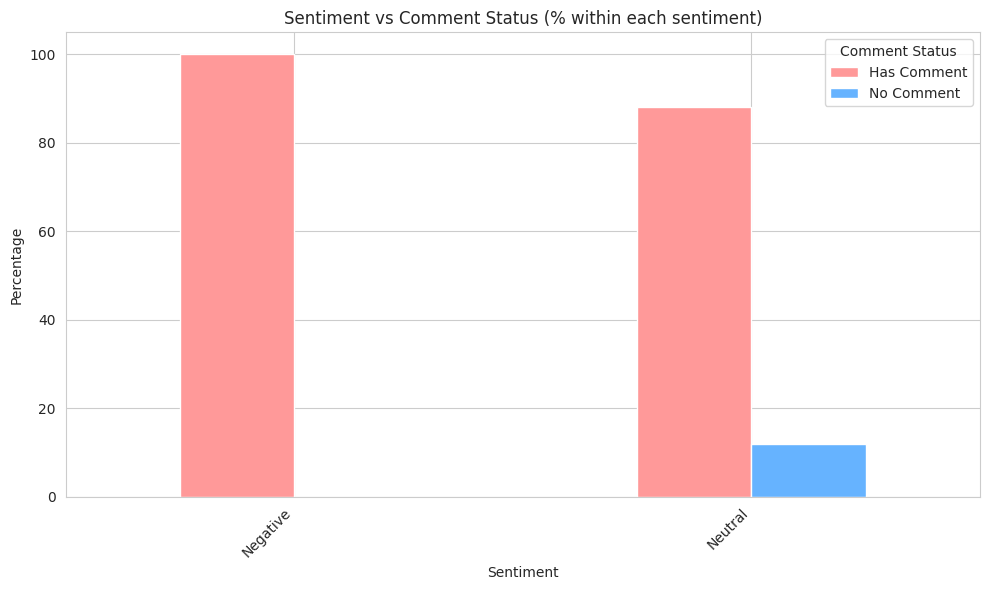

In [55]:
from scipy.stats import chi2_contingency

def analyze_sentiment_relationship(df, column_name, title=None):
    """Analyze relationship between a column and sentiments"""
    if title is None:
        title = column_name
    
    # Crosstab
    ct = pd.crosstab(df[column_name], df['sentiments'])
    ct_prop = ct.div(ct.sum(axis=1), axis=0)
    
    print(f"\n{title} vs Sentiments (Counts):\n", ct)
    print(f"\n{title} vs Sentiments (Proportions):\n", ct_prop)
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"\nChi-square: {chi2:.3f}, p-value: {p:.4f}")
    
    # Visualization
    plt.figure(figsize=(8,5))
    ct_prop.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgray'])
    plt.title(f'{title} vs Sentiments (Proportion)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sentiments')
    plt.tight_layout()
    plt.show()

# Then use it:
analyze_sentiment_relationship(df, 'fleet_usage', 'Fleet Usage')
analyze_sentiment_relationship(df, 'response_group', 'Response Group')
analyze_sentiment_relationship(df, 'loyalty_program_level', 'Loyalty Program Level')

# Additional analysis: Neutral sentiment and no_comment relationship
print("\n" + "="*60)
print("NEUTRAL SENTIMENT AND NO_COMMENT ANALYSIS")
print("="*60)

# Check if sentiments column exists (before you drop it!)
if 'sentiments' in df.columns:
    # Crosstab between sentiments and verbatim_text (no_comment vs others)
    df['has_comment'] = df['verbatim_text'].apply(lambda x: 'no_comment' if x == 'no_comment' else 'has_comment')
    
    ct_neutral = pd.crosstab(df['sentiments'], df['has_comment'])
    ct_neutral_prop = ct_neutral.div(ct_neutral.sum(axis=1), axis=0) * 100
    
    print("\nSentiments vs Comment Status (Counts):")
    print(ct_neutral)
    print("\nSentiments vs Comment Status (Percentages):")
    print(ct_neutral_prop.round(2))
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(ct_neutral)
    print(f"\nChi-square: {chi2:.3f}, p-value: {p:.4f}")
    
    # Specifically for Neutral sentiment
    neutral_no_comment = len(df[(df['sentiments'] == 'Neutral') & (df['verbatim_text'] == 'no_comment')])
    neutral_total = len(df[df['sentiments'] == 'Neutral'])
    neutral_pct = (neutral_no_comment / neutral_total * 100) if neutral_total > 0 else 0
    
    print(f"\n📊 Neutral Sentiment Analysis:")
    print(f"   - Total Neutral sentiments: {neutral_total}")
    print(f"   - Neutral with no_comment: {neutral_no_comment}")
    print(f"   - Percentage: {neutral_pct:.2f}%")
    
    # Visualization
    plt.figure(figsize=(8,5))
    ct_neutral_prop.plot(kind='bar', color=['#ff9999', '#66b3ff'])
    plt.title('Sentiment vs Comment Status (% within each sentiment)')
    plt.ylabel('Percentage')
    plt.xlabel('Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comment Status', labels=['Has Comment', 'No Comment'])
    plt.tight_layout()
    plt.show()
    
    # Clean up temporary column
    df.drop(columns=['has_comment'], inplace=True)
else:
    print("⚠️ Warning: 'sentiments' column not found. Make sure to run this before dropping the sentiments column!")

In [56]:
df.drop(columns=['sentiments'], inplace=True)

**5. Save**

In [57]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9423 entries, 0 to 9423
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             9423 non-null   int64 
 1   origin_station_code       9423 non-null   object
 2   destination_station_code  9423 non-null   object
 3   scheduled_departure_date  9423 non-null   object
 4   arrival_delay_group       9423 non-null   object
 5   departure_delay_group     9423 non-null   object
 6   entity                    9423 non-null   object
 7   verbatim_text             9423 non-null   object
 8   seat_factor_band          9423 non-null   object
 9   loyalty_program_level     9423 non-null   object
 10  fleet_type_description    9423 non-null   object
 11  fleet_usage               9423 non-null   object
 12  response_group            9423 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,there was no salad dressing. the staff informe...,0 to 70,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,not a choice.,0 to 70,non-member,B777-200,Mainline,non-member
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,more variety and bigger snacks.,90+,non-elite,A320-200,Mainline,member
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,Express,member
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,more inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,Mainline,member


In [ ]:
df.to_csv("data/cleaned/Customer_Feedback_Cleaned.csv", index=False)